# Классификация с помощью kNN. Кластеризация K-means

In [112]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [113]:
X, y = load_iris(return_X_y=True)
X = X[:, :2]

In [114]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

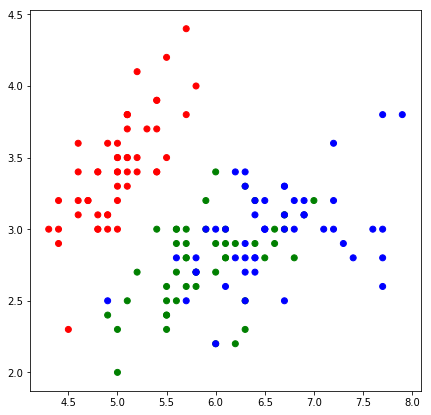

In [115]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap);

In [161]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

In [162]:
def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
        
        for i in range(len(x_train)):
            distance = e_metrics(x, x_train[i])
            
            test_distances.append((distance, y_train[i]))
        
        classes = {class_item: 0 for class_item in set(y_train)}
        
        for d in sorted(test_distances)[:k]:
            classes[d[1]] += 1
            
        answers.append(sorted(classes, key=classes.get)[-1])
        
    return answers

In [163]:
def accuracy(pred, y):
    return (sum(pred==y)/len(y))

In [119]:
def get_graph(X_train, y_train, k):
    
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = 0.02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

## Обучение без учителя. Кластеризация. K-means

In [120]:
from sklearn.datasets import make_blobs
import random

X, y = make_blobs(n_samples=100, random_state=1)

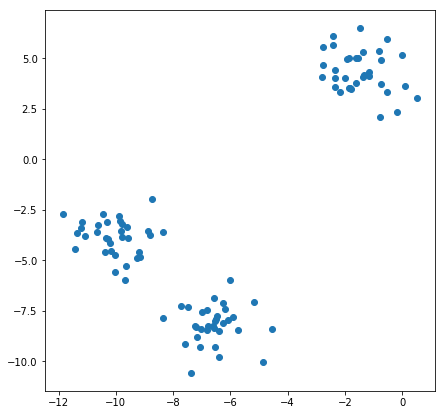

In [121]:
plt.figure(figsize=(7,7))
plt.scatter(X[:, 0], X[:, 1]);

In [132]:
def kmeans(data, k, max_iterations, min_distance):
    
    classes = {i: [] for i in range(k)}
    
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):
        for x in data:
            distances = [e_metrics(x, centroid) for centroid in centroids]
            classification = distances.index(min(distances))
            classes[classification].append(x)
            
        old_centroids = centroids.copy()
        
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0)
            
        optimal = True
        for centroid in range(len(centroids)):
            if np.sum(np.abs((centroids[centroid] - old_centroids[centroid])/old_centroids * 100)) > min_distance:
                optimal = False
        
        if optimal:
            break
            
    return old_centroids, classes

In [133]:
def visualize(centroids, classes):
    colors = ['r', 'g', 'b']
    
    plt.figure(figsize=(7,7))
    
    # нанесем на график центроиды
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')
        
    # нанесем объекты раскрашенные по классам
    for class_item in classes:
        for x in classes[class_item]:
            plt.scatter(x[0], x[1], color=colors[class_item])
            
    plt.show()

## Домашнее задание

1. К алгоритму kNN, реализованному на уроке, реализовать добавление весов соседей по любому из показанных на уроке принципов.


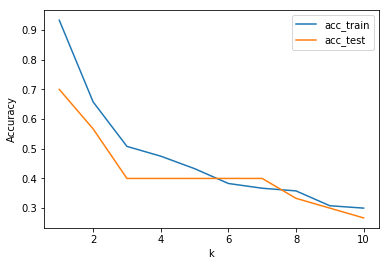

0.933 0.7


(0, 0)

In [250]:
def best_k_plot(X_train, X_test, n = 10):
    acc_train = []
    acc_test = []
    n+=1
    for k in range(1,n):
#         print(k)
        y_pred = knn(X_train, y_train, X_train, k)
        acc_train_i = round(accuracy(y_pred, y_train), 3)
    #     print(f'Точность на train knn при k = {k}: {acc_train_i}')
        acc_train.append(acc_train_i)

        y_pred = knn(X_train, y_train, X_test, k)
        acc_test_i = round(accuracy(y_pred, y_test), 3)
    #     print( f'Точность knn при k = {k}: {acc_test_i}')
        acc_test.append(acc_test_i)
    #     print('---')

    k_ax = [i for i in range(1,n)] 
    # print(k_ax)
    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.plot(k_ax, acc_train, label='acc_train')
    plt.plot(k_ax, acc_test, label='acc_test')
    plt.legend(loc='train|test')
    plt.show()
    
    best_k = (acc_train.index(max(acc_train)), acc_test.index(max(acc_test)))
#     print(best_k)
    print(max(acc_train), max(acc_test))
    return best_k

best_k_plot(X_train, X_test, n = 10)

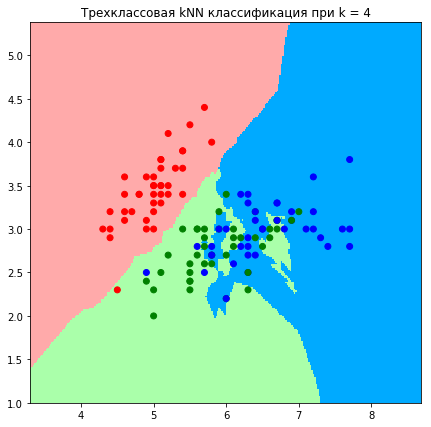

In [165]:
get_graph(X_train, y_train, 4)

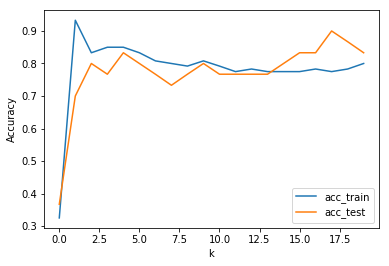

0.933 0.9


(1, 17)

In [166]:


n = 20


best_k_plot(X_train, X_test, n)

In [253]:
# Реализуем функцию расчёта весов по дистанции между объектами

def calc_weight(distance):
    a = 1e-5
    weight = 1 / (distance + a)
    return weight

In [245]:
def calc_weight(distance):
    '''
    Расчёт весов по дистанции между объектами
    '''
    
    a = 1e-7
#     weight = 1 / (distance + a)
    weight = 1/(np.sqrt(distance) + a)
    return weight

In [257]:
def calc_weight(distance, q = 0.3):
    '''
    Расчёт весов по степени дистанции между объектами
    
    '''
    
    a = 1e-7
#     weight = 1 / (distance + a)
    weight = q ** distance
    return weight

In [258]:
from itertools import combinations

def calc_prediction(weights):
    weighted_sum = 0
    weight_product = 1
    combination_sum = 0

    for value, weight in weights.items():
        weighted_sum += value/weight
        weight_product *= weight
#     print(weights)
#     print(weights.values())
    
    for x in list(combinations(weights.values(), len(weights.values())-1)):
        combination_sum += np.prod(x)

    prediction = (weight_product/combination_sum) * weighted_sum

    return prediction

In [259]:

def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        

        # Сортируем список и среди первых k элементов подсчитаем веса этих элементов, основанные на дистанции до них
        weights = {}
        for d in sorted(test_distances)[:k]:
            weights[d[1]] = calc_weight(d[0])
            
        answers.append(calc_prediction(weights))
        
    return answers

In [260]:
pred = knn(X_train, y_train, X_test, 4)
accuracy(pred, y_test)

0.4

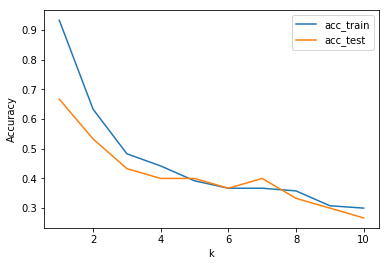

0.933 0.667


(0, 0)

In [261]:
n = 10
best_k_plot(X_train, X_test, n)

In [ ]:
get_graph(X_train, y_train, 2)

In [262]:
k = 2

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_test, y_pred):.3f}')

Точность алгоритма при k = 2: 0.533


2. Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутрикластерное расстояние и построить график ее зависимости от k (взять от 1 до 10) для выборки данных из данного урока.

In [130]:
# Реализуем функцию вычисления среднего квадратичного внутриклассового расстояния
def calc_inner_distance(centroids, clusters):
    
    '''
    
    '''
    
    distances = np.zeros(len(centroids))
    result = 0

    for i, centroid in enumerate(centroids):
        for x in clusters[i]:
            distances[i] += e_metrics(x, centroid)**2
        result += distances[i] / len(clusters[i])
        
    return result

In [136]:
# Построим несколько моделей с разным количество кластеров
max_iterations = 10
min_distance = 1e-4
k = 3



clusters_count_list = list(range(1,11))


cls = [kmeans(X, k, max_iterations, min_distance) for k in clusters_count_list]
inner_distances = [calc_inner_distance(centroids, clusters) for centroids, clusters in cls]

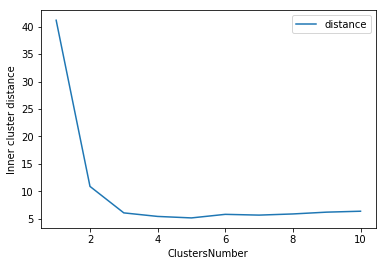

In [137]:
# Построим на графике зависимость среднеквадратичного внутрикластерного рассотояния от количества кластеров
plt.xlabel('ClustersNumber')
plt.ylabel('Inner cluster distance')
plt.plot(clusters_count_list, inner_distances, label='distance')
plt.legend(loc='upper right')
plt.show()